<a href="https://colab.research.google.com/github/asmaislampromi/Assignment_3/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


**Data** **Preprocessing**

In [ ]:
import pandas as pd

# Load the first dataset
file_path = '/content/A.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,18-11-1999,28.612303,32.546494,62546380,35.765381,31.473534,27.066582
1,19-11-1999,28.478184,30.713518,15234146,30.758226,28.880545,24.836662
2,22-11-1999,28.657009,29.551144,6577870,31.473534,31.473534,27.066582
3,23-11-1999,28.612303,30.400572,5975611,31.205294,28.612303,24.605980
4,24-11-1999,28.612303,28.701717,4843231,29.998213,29.372318,25.259573


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Use the 'Close' prices for the prediction model
close_prices = data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

# Create sequences
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(close_prices_scaled)):
    X.append(close_prices_scaled[i-sequence_length:i, 0])
    y.append(close_prices_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Reshape X
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Check the shapes of the data
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5744, 60, 1)
y shape: (5744,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of the split data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4595, 60, 1)
y_train shape: (4595,)
X_test shape: (1149, 60, 1)
y_test shape: (1149,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets (80% train, 20% validation)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Check the shapes of the split data
print("X_train_split shape:", X_train_split.shape)
print("y_train_split shape:", y_train_split.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train_split shape: (3676, 60, 1)
y_train_split shape: (3676,)
X_val shape: (919, 60, 1)
y_val shape: (919,)


**Simple** **RNN** **Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Build the RNN model
model = Sequential()

# Add an RNN layer
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train_split.shape[1], 1)))

# Add a Dense layer for output
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summarize the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
history = model.fit(X_train_split, y_train_split, epochs=10, batch_size=32, validation_data=(X_val, y_val))



Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0115 - val_loss: 2.0722e-04
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.5005e-04 - val_loss: 4.3517e-05
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0806e-04 - val_loss: 8.2534e-05
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.5147e-05 - val_loss: 8.6696e-05
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.6020e-05 - val_loss: 4.6942e-05
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.8958e-05 - val_loss: 3.4982e-05
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9482e-05 - val_loss: 4.7590e-05
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.8756e-05 - val_loss: 6.5662e-05
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.2906e-05 - val_loss: 7.6656e-05
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.3260e-05 - val_loss: 5.8365e-05


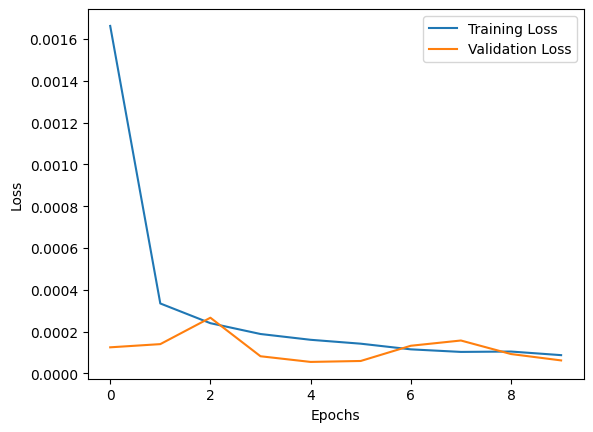

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Invert scaling to get actual values for predictions and y_test
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))




36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)  # Calculate the Root Mean Squared Error (RMSE)

# Calculate the R² score
r2 = r2_score(y_test_actual, predictions)

# Calculate Accuracy
accuracy = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

# Print the metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy}%")


MSE: 60.4606079387918
RMSE: 7.7756419631302345
R² Score: 0.9427404209949456
Accuracy: 4.448555549771056%


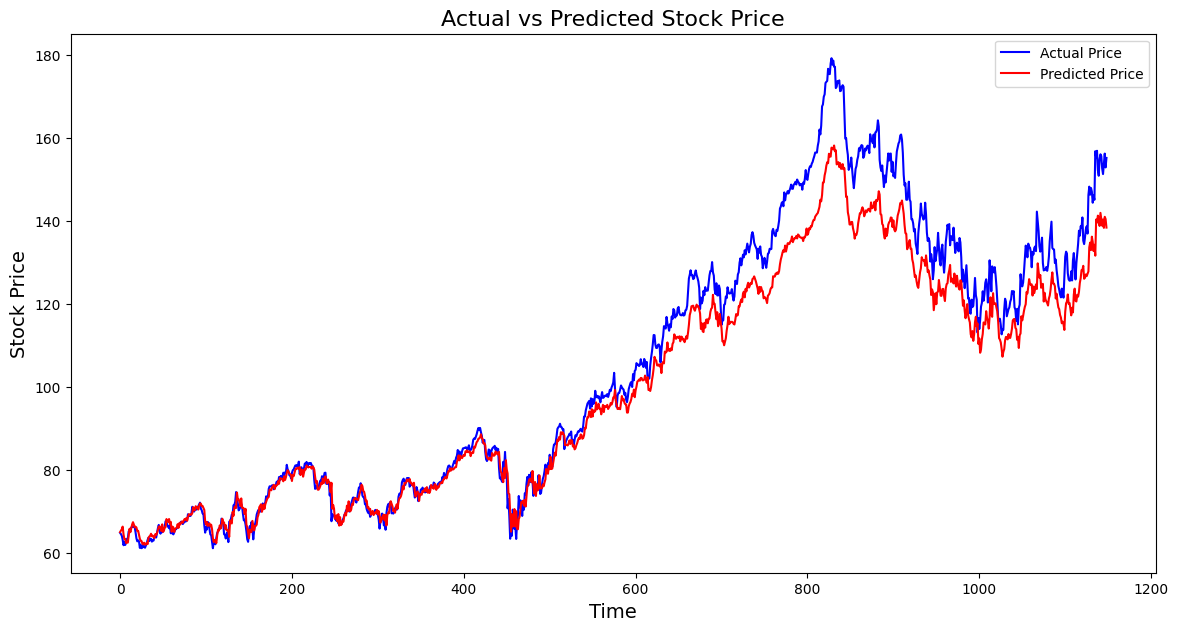

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Stock Price', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend()

# Show the plot
plt.show()


**Hyperparameter** **Tuning** **for**
**RNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperparameters
units = [50, 100, 150]
learning_rates = [0.001, 0.0005, 0.005]
batch_sizes = [32, 64]
epochs = [10, 20, 50]
best_model = None
best_val_loss = float('inf')
best_params = {}

for unit in units:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epoch in epochs:
                print(f"Training with: units={unit}, lr={lr}, batch_size={batch_size}, epochs={epoch}")

                # Build the RNN model
                model = Sequential()
                model.add(SimpleRNN(units=unit, return_sequences=False, input_shape=(X_train_split.shape[1], 1)))
                model.add(Dense(1))

                # Compile the model
                model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

                # Train the model
                history = model.fit(X_train_split, y_train_split, epochs=epoch, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

                # Evaluate the model on validation data
                val_loss = history.history['val_loss'][-1]
                print(f"Validation Loss: {val_loss}")

                # Save the best model and parameters
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_model = model
                    best_params = {'units': unit, 'learning_rate': lr, 'batch_size': batch_size, 'epochs': epoch}

# Output the best parameters and model
print("\nBest Hyperparameters:", best_params)


Training with: units=50, lr=0.001, batch_size=32, epochs=10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Loss: 8.64493558765389e-05
Training with: units=50, lr=0.001, batch_size=32, epochs=20
Validation Loss: 6.196959293447435e-05
Training with: units=50, lr=0.001, batch_size=32, epochs=50
Validation Loss: 1.9549548596842214e-05
Training with: units=50, lr=0.001, batch_size=64, epochs=10
Validation Loss: 0.00013018485333304852
Training with: units=50, lr=0.001, batch_size=64, epochs=20
Validation Loss: 2.855220009223558e-05
Training with: units=50, lr=0.001, batch_size=64, epochs=50
Validation Loss: 2.9838021873729303e-05
Training with: units=50, lr=0.0005, batch_size=32, epochs=10
Validation Loss: 3.8078418583609164e-05
Training with: units=50, lr=0.0005, batch_size=32, epochs=20
Validation Loss: 2.0545036022667773e-05
Training with: units=50, lr=0.0005, batch_size=32, epochs=50
Validation Loss: 1.8823640857590362e-05
Training with: units=50, lr=0.0005, batch_size=64, epochs=10
Validation Loss: 5.632716784020886e-05
Training with: units=50, lr=0.0005, batch_size=64, epochs=20


In [ ]:
# Retrain the model using the best hyperparameters
model = Sequential()
model.add(SimpleRNN(units=best_params['units'], return_sequences=False, input_shape=(X_train_split.shape[1], 1)))
model.add(Dense(1))



In [ ]:
# Compile the model with the best learning rate
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')

# Train the model with the best batch size and epochs
history = model.fit(X_train_split, y_train_split, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_val, y_val))


Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0061 - val_loss: 0.0020
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8220e-04 - val_loss: 1.7621e-04
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2851e-04 - val_loss: 1.2878e-04
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.3174e-04 - val_loss: 1.3312e-04
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.5621e-04 - val_loss: 2.5042e-04
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.3790e-04 - val_loss: 1.4870e-04
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.3651e-04 - val_loss: 5.6668e-05
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.1541e-04 - val_loss: 1.1869e-04
Epoch 9/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1151e-04 - val_loss: 4.6399e-05
Epoch 10/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0366e-04 - val_loss: 5.1791e-05
Epoch 11/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - los

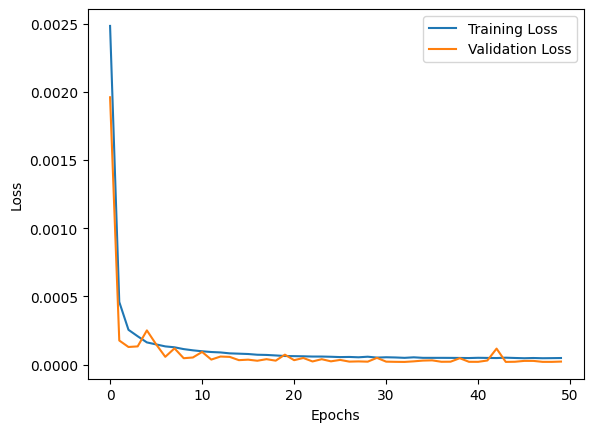

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



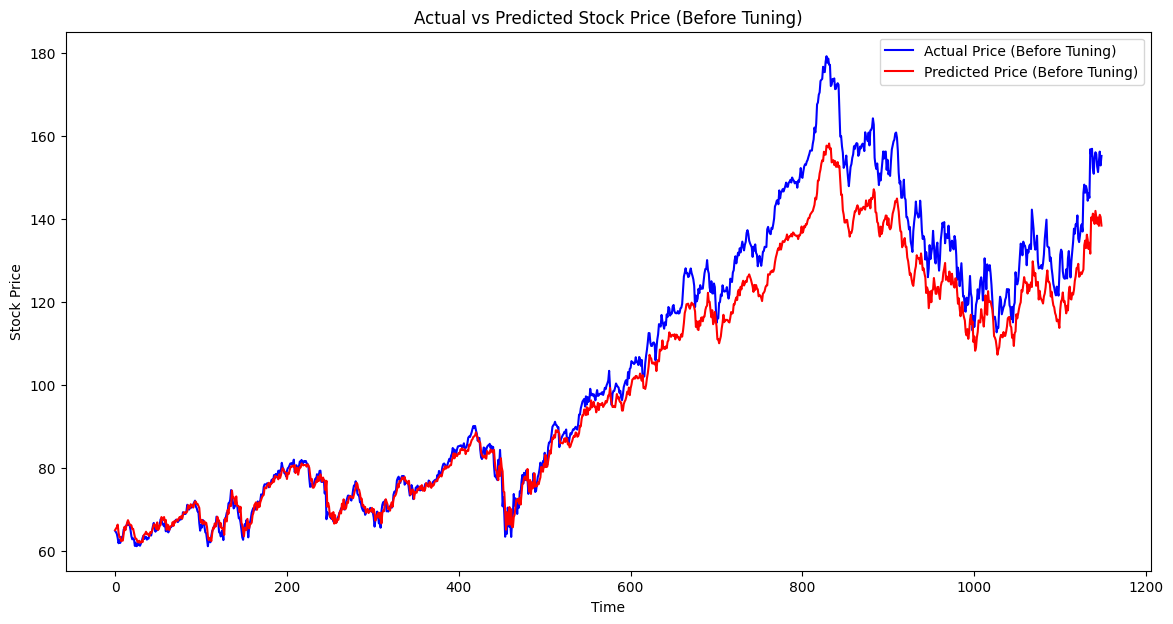

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


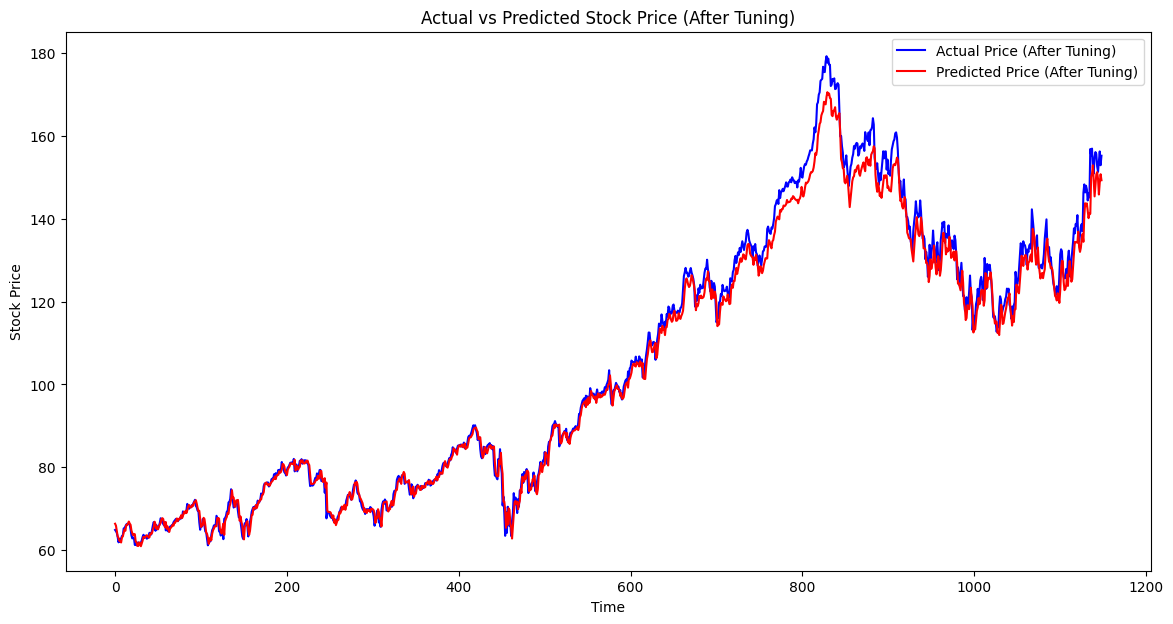

In [ ]:
# Plot Actual vs Predicted for the model before tuning
plt.figure(figsize=(14,7))
plt.plot(y_test_actual, color='blue', label='Actual Price (Before Tuning)')
plt.plot(predictions, color='red', label='Predicted Price (Before Tuning)')
plt.title('Actual vs Predicted Stock Price (Before Tuning)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot Actual vs Predicted for the model after tuning
predictions_best = best_model.predict(X_test)

# Invert scaling
predictions_best = scaler.inverse_transform(predictions_best)
y_test_actual_best = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14,7))
plt.plot(y_test_actual_best, color='blue', label='Actual Price (After Tuning)')
plt.plot(predictions_best, color='red', label='Predicted Price (After Tuning)')
plt.title('Actual vs Predicted Stock Price (After Tuning)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# Print final performance metrics
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predictions)
accuracy = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy}%")

MSE: 7.788335941664135
RMSE: 2.7907590260830717
R² Score: 0.9926240100393782
Accuracy: 1.7869742340723354%


In [ ]:
# Calculate and print metrics before tuning
mse_before = mean_squared_error(y_test_actual, predictions)
rmse_before = np.sqrt(mse_before)
r2_before = r2_score(y_test_actual, predictions)
accuracy_before = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

print(f"Before Tuning - MSE: {mse_before}, RMSE: {rmse_before}, R²: {r2_before}, Accuracy: {accuracy_before}%")

# Calculate and print metrics after tuning
mse_after = mean_squared_error(y_test_actual_best, predictions_best)
rmse_after = np.sqrt(mse_after)
r2_after = r2_score(y_test_actual_best, predictions_best)
accuracy_after = np.mean(np.abs((y_test_actual_best - predictions_best) / y_test_actual_best)) * 100

print(f"After Tuning - MSE: {mse_after}, RMSE: {rmse_after}, R²: {r2_after}, Accuracy: {accuracy_after}%")


Before Tuning - MSE: 7.788335941664135, RMSE: 2.7907590260830717, R²: 0.9926240100393782, Accuracy: 1.7869742340723354%
After Tuning - MSE: 10.208737243412163, RMSE: 3.1951114602486346, R²: 0.9903317545645128, Accuracy: 1.9480143923503528%


**LSTM** **model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
model_lstm = Sequential()

# Add an LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_split.shape[1], 1)))

# Add a Dense layer for output
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summarize the model
model_lstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the LSTM model
history_lstm = model_lstm.fit(X_train_split, y_train_split, epochs=10, batch_size=32, validation_data=(X_val, y_val))




Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0026 - val_loss: 6.3723e-05
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8396e-04 - val_loss: 8.2807e-05
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5157e-04 - val_loss: 2.5152e-04
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7074e-04 - val_loss: 1.8603e-04
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0995e-04 - val_loss: 1.7946e-04
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1400e-04 - val_loss: 2.4462e-04
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0551e-04 - val_loss: 4.1945e-05
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3414e-04 - val_loss: 7.3910e-05
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.0358e-05 - val_loss: 7.2140e-05
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1304e-04 - val_loss: 5.3612e-05


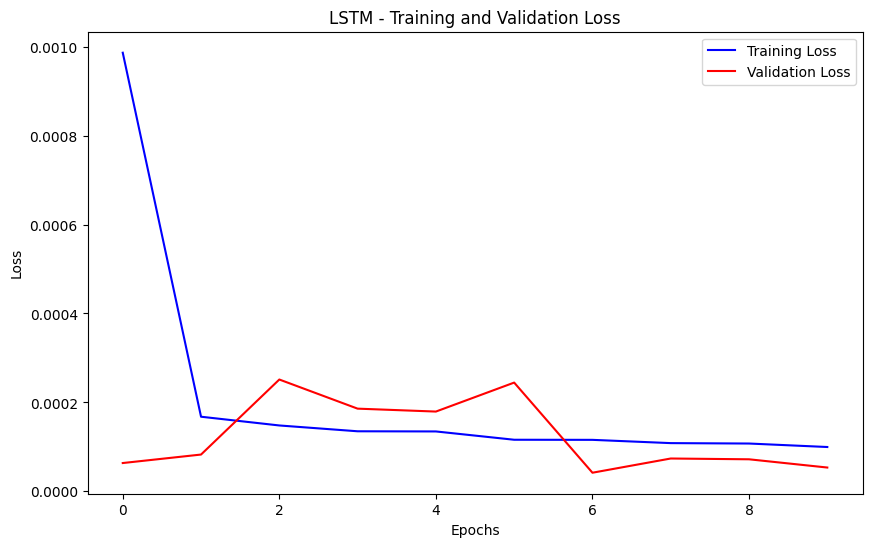

In [ ]:
# Plot training and validation loss for LSTM
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='red')
plt.title('LSTM - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


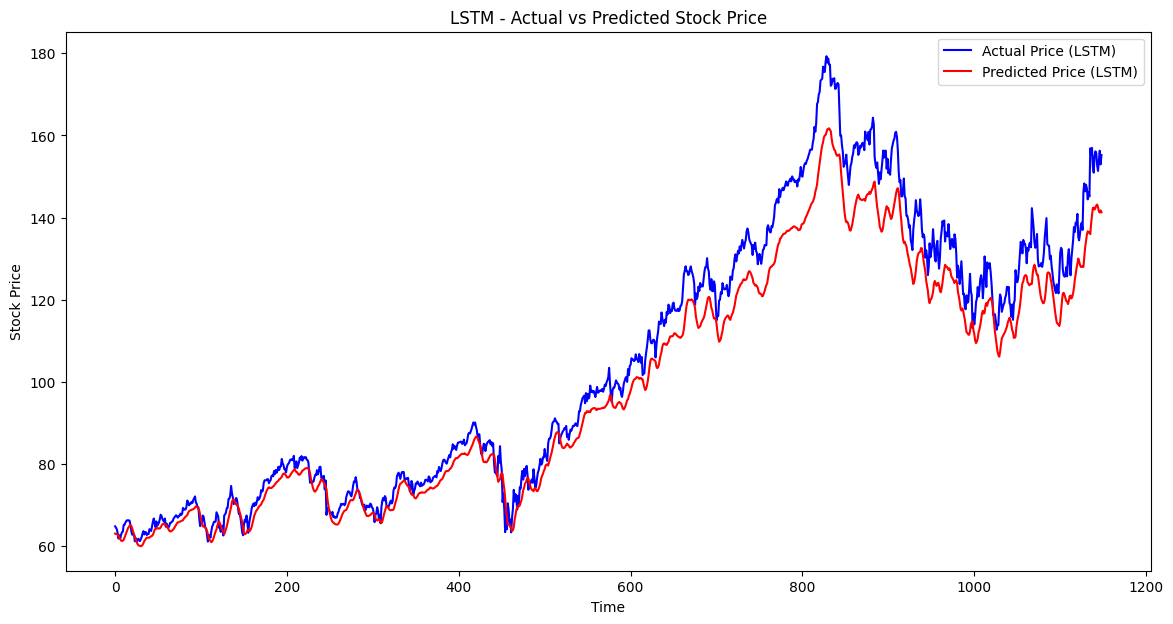

In [ ]:
# Make predictions for LSTM model
predictions_lstm = model_lstm.predict(X_test)

# Invert scaling
predictions_lstm = scaler.inverse_transform(predictions_lstm)
y_test_actual_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Actual vs Predicted Stock Prices for LSTM
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual_lstm, color='blue', label='Actual Price (LSTM)')
plt.plot(predictions_lstm, color='red', label='Predicted Price (LSTM)')
plt.title('LSTM - Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate performance metrics for LSTM
mse_lstm = mean_squared_error(y_test_actual_lstm, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_actual_lstm, predictions_lstm)
accuracy_lstm = np.mean(np.abs((y_test_actual_lstm - predictions_lstm) / y_test_actual_lstm)) * 100

print(f"LSTM - MSE: {mse_lstm}")
print(f"LSTM - RMSE: {rmse_lstm}")
print(f"LSTM - R² Score: {r2_lstm}")
print(f"LSTM - Accuracy: {accuracy_lstm}%")


LSTM - MSE: 57.62228878879513
LSTM - RMSE: 7.590934645272289
LSTM - R² Score: 0.9454284680581727
LSTM - Accuracy: 5.126494398087397%


**GRU** **model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# Build the GRU model
model_gru = Sequential()

# Add a GRU layer
model_gru.add(GRU(units=50, return_sequences=False, input_shape=(X_train_split.shape[1], 1)))

# Add a Dense layer for output
model_gru.add(Dense(1))

# Compile the model
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summarize the model
model_gru.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the GRU model
history_gru = model_gru.fit(X_train_split, y_train_split, epochs=10, batch_size=32, validation_data=(X_val, y_val))



Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.1080e-05 - val_loss: 2.5337e-05
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1088e-05 - val_loss: 3.5384e-05
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1318e-05 - val_loss: 5.7237e-05
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1578e-05 - val_loss: 3.3788e-05
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5197e-05 - val_loss: 2.2381e-05
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3495e-05 - val_loss: 2.8947e-05
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4497e-05 - val_loss: 2.3717e-05
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.7880e-05 - val_loss: 5.6552e-05
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1494e-05 - val_loss: 1.9743e-05
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.0358e-05 - val_loss: 2.2175e-05


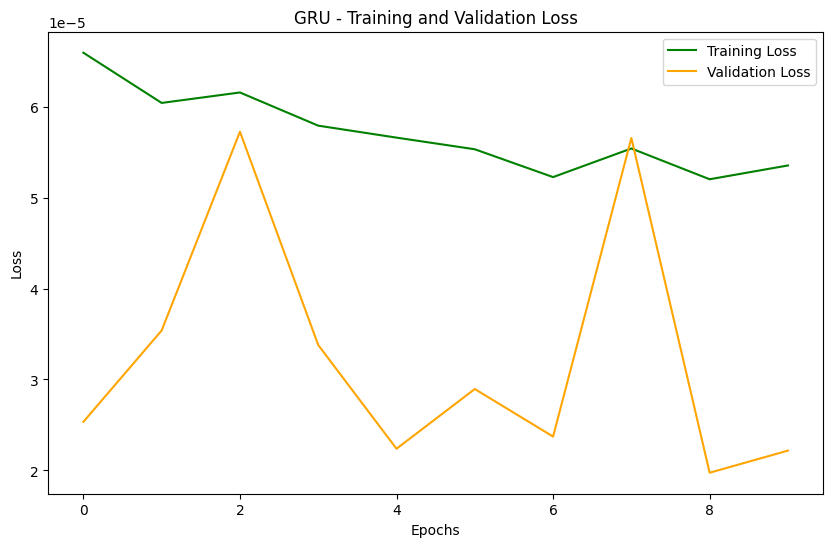

In [ ]:

# Plot training and validation loss for GRU
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='Training Loss', color='green')
plt.plot(history_gru.history['val_loss'], label='Validation Loss', color='orange')
plt.title('GRU - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


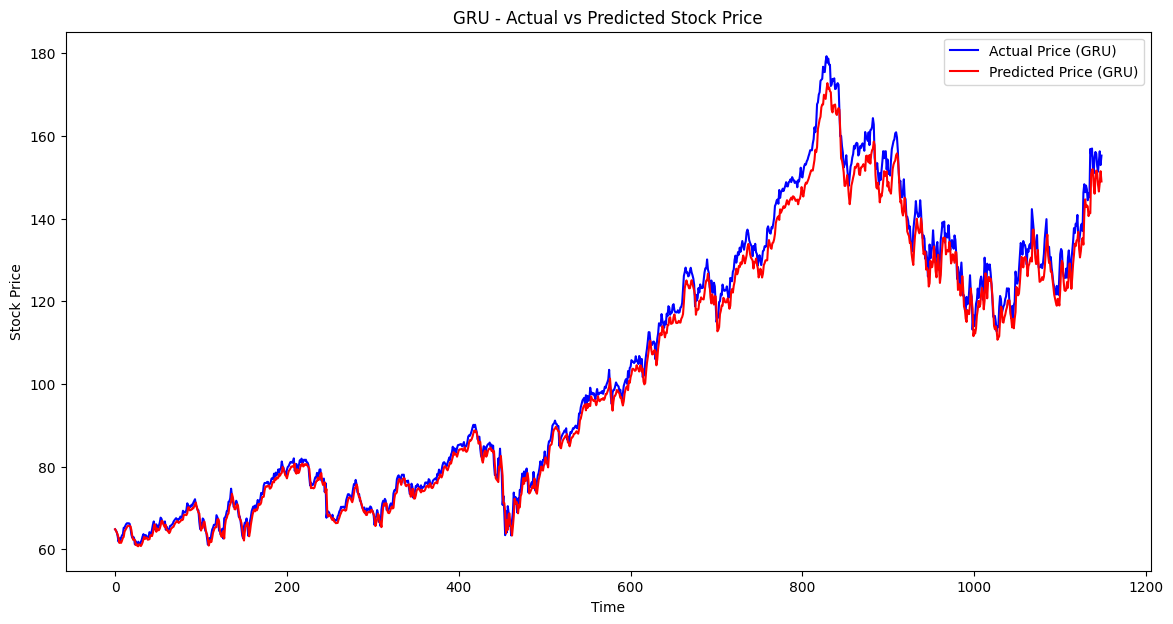

In [ ]:
# Make predictions for GRU model
predictions_gru = model_gru.predict(X_test)

# Invert scaling
predictions_gru = scaler.inverse_transform(predictions_gru)
y_test_actual_gru = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Actual vs Predicted Stock Prices for GRU
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual_gru, color='blue', label='Actual Price (GRU)')
plt.plot(predictions_gru, color='red', label='Predicted Price (GRU)')
plt.title('GRU - Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate performance metrics for GRU
mse_gru = mean_squared_error(y_test_actual_gru, predictions_gru)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test_actual_gru, predictions_gru)
accuracy_gru = np.mean(np.abs((y_test_actual_gru - predictions_gru) / y_test_actual_gru)) * 100

print(f"GRU - MSE: {mse_gru}")
print(f"GRU - RMSE: {rmse_gru}")
print(f"GRU - R² Score: {r2_gru}")
print(f"GRU - Accuracy: {accuracy_gru}%")


GRU - MSE: 11.167188152256758
GRU - RMSE: 3.3417343030613247
GRU - R² Score: 0.9894240479203288
GRU - Accuracy: 2.2829598311193493%
